# Task 1
# Prediction of survival of a passenger based on gender,status and age etc

# Loading Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
!pip install missingno # i already installed these , but just to show command to install if not 
!pip install category_encoders


# Loading the dataset

In [492]:
train=pd.read_csv("train.csv")
print(train)



     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                    Name     Sex   Age  SibSp  \
0                                Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                                 Heikkinen, Miss. Laina  female  26.0      0   
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                               Allen, Mr. William Henry    male  35.0      0   
..                                                   ... 

# Analysis on train dataset

- checking the null count in each column of train dataset

In [434]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


we have:
- total 10 features
- where survived is the targeted feature

- statiscal analysis of whole dataset 

In [438]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- getting percentage of missing values in each columnof dataset 

In [441]:
missing_percentages = train.isnull().sum() * 100 / len(train)
print(missing_percentages)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


# Analysis On columns Used for predicting the survival rate 

_ These are all the column in our dataset. The one which can contribute are:
- Age
- Cabin
- Pclass
- Embark

# 1- Age

In [446]:

print(train['Age'].isnull().sum())  # checking the number of missing values in the 'Age' column
train['Age'].fillna(train['Age'].median(), inplace=True)  #filling  missing values in 'Age' with the median age

train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 60, np.inf], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']) #calculating the survival rate by age group
survival_rate_by_age_group = train.groupby('AgeGroup')['Survived'].mean() # calculating the survival rate for each age group

print(survival_rate_by_age_group)


177
AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.353271
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64


C:\Users\PMLS\AppData\Local\Temp\ipykernel_23132\3128867792.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)  #filling  missing values in 'Age' with the median age
C:\Users\PMLS\AppData\Local\Temp\ipykernel_23132\3128867792.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv

There are 177 missing values in the Age column.
The survival rates for each age group are as follows:
- Child (0-12 years): 57.97%
- Teen (13-18 years): 42.86%
- Young Adult (19-35 years): 35.33%
- Adult (36-60 years): 40.00%
- Senior (61+ years): 22.73%
This analysis shows that children had the highest survival rate, followed by adults, teens, young adults, and seniors. This indicates that age is an important factor in predicting survival, with younger passengers, particularly children, having a higher chance of survival.

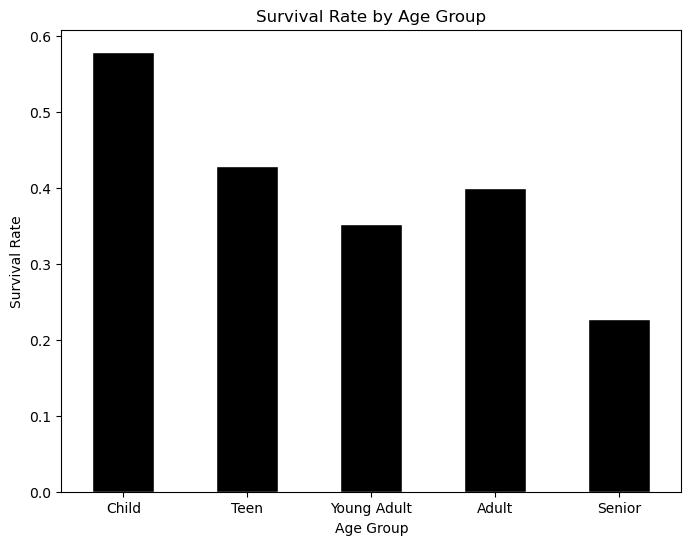

In [449]:
plt.figure(figsize=(8, 6))
survival_rate_by_age_group.plot(kind='bar', color='black', edgecolor='white')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

# 2-Cabin

In [452]:

print("Total Number of missingvalues are: ",train['Cabin'].isnull().sum()) # checking the number of missing values in the 'Cabin' column

train['CabinKnown'] = train['Cabin'].notnull().astype(int) #creating a new feature indicating whether a cabin number is known

survival_rate_with_cabin = train[train['CabinKnown'] == 1]['Survived'].mean() # checking the survival rate based on whether the cabin is known
survival_rate_without_cabin = train[train['CabinKnown'] == 0]['Survived'].mean()

print(f'Survival rate with cabin known: {survival_rate_with_cabin}')
print(f'Survival rate without cabin known: {survival_rate_without_cabin}')


Total Number of missingvalues are:  687
Survival rate with cabin known: 0.6666666666666666
Survival rate without cabin known: 0.29985443959243085


C:\Users\PMLS\AppData\Local\Temp\ipykernel_23132\3320866962.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CabinKnown', y='SurvivalRate', data=survival_rates, palette='viridis', edgecolor='black')


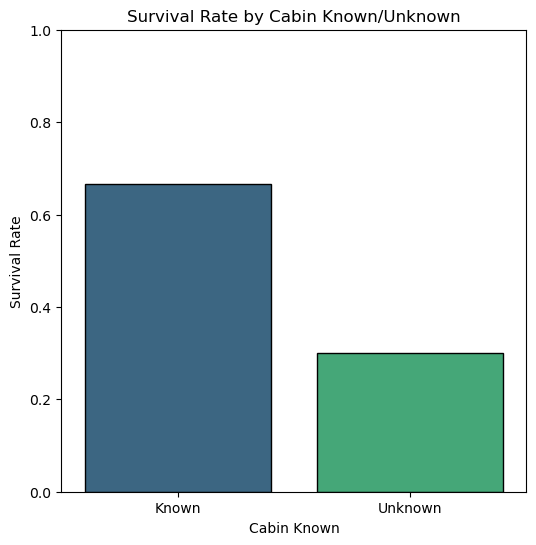

In [454]:

survival_rates = pd.DataFrame({
    'CabinKnown': ['Known', 'Unknown'],
    'SurvivalRate': [survival_rate_with_cabin, survival_rate_without_cabin]
})

plt.figure(figsize=(6, 6))
sns.barplot(x='CabinKnown', y='SurvivalRate', data=survival_rates, palette='viridis', edgecolor='black')
plt.title('Survival Rate by Cabin Known/Unknown')
plt.xlabel('Cabin Known')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

# 3-Embark

['S' 'C' 'Q' nan]
2
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


C:\Users\PMLS\AppData\Local\Temp\ipykernel_23132\672511125.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)  #fill ming issing values in 'Embarked' with the most common value
C:\Users\PMLS\AppData\Local\Temp\ipykernel_23132\672511125.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Surviv

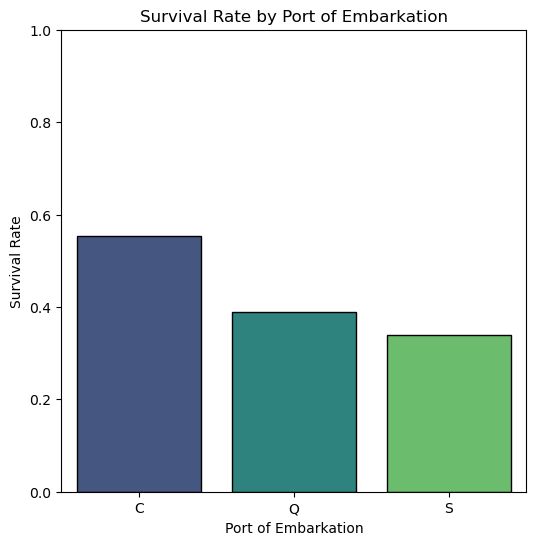

In [457]:

print(train['Embarked'].unique()) # checking the unique values in the 'Embarked' column
print(train['Embarked'].isnull().sum()) # checking the number of missing values in the 'Embarked' column

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)  #fill ming issing values in 'Embarked' with the most common value

survival_rate_by_embarked = train.groupby('Embarked')['Survived'].mean()

print(survival_rate_by_embarked)

survival_rates_embarked = pd.DataFrame({
    'Embarked': survival_rate_by_embarked.index,
    'SurvivalRate': survival_rate_by_embarked.values
})

# visualization of the survival rate by embarkation port
plt.figure(figsize=(6, 6))
sns.barplot(x='Embarked', y='SurvivalRate', data=survival_rates_embarked, palette='viridis', edgecolor='black')
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


The unique values in the Embarked column are 'S', 'C', 'Q', and there are some missing values (nan).
There are 2 missing values in the Embarked column.
The survival rates for each port of embarkation are as follows:
- Cherbourg (C): 55.36%
- Queenstown (Q): 38.96%
- Southampton (S): 33.90%
This analysis shows that passengers who embarked at Cherbourg had the highest survival rate, followed by those who embarked at Queenstown and Southampton. 

# 4-Gender

['male' 'female']
0
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Pclass and Gender Survival')

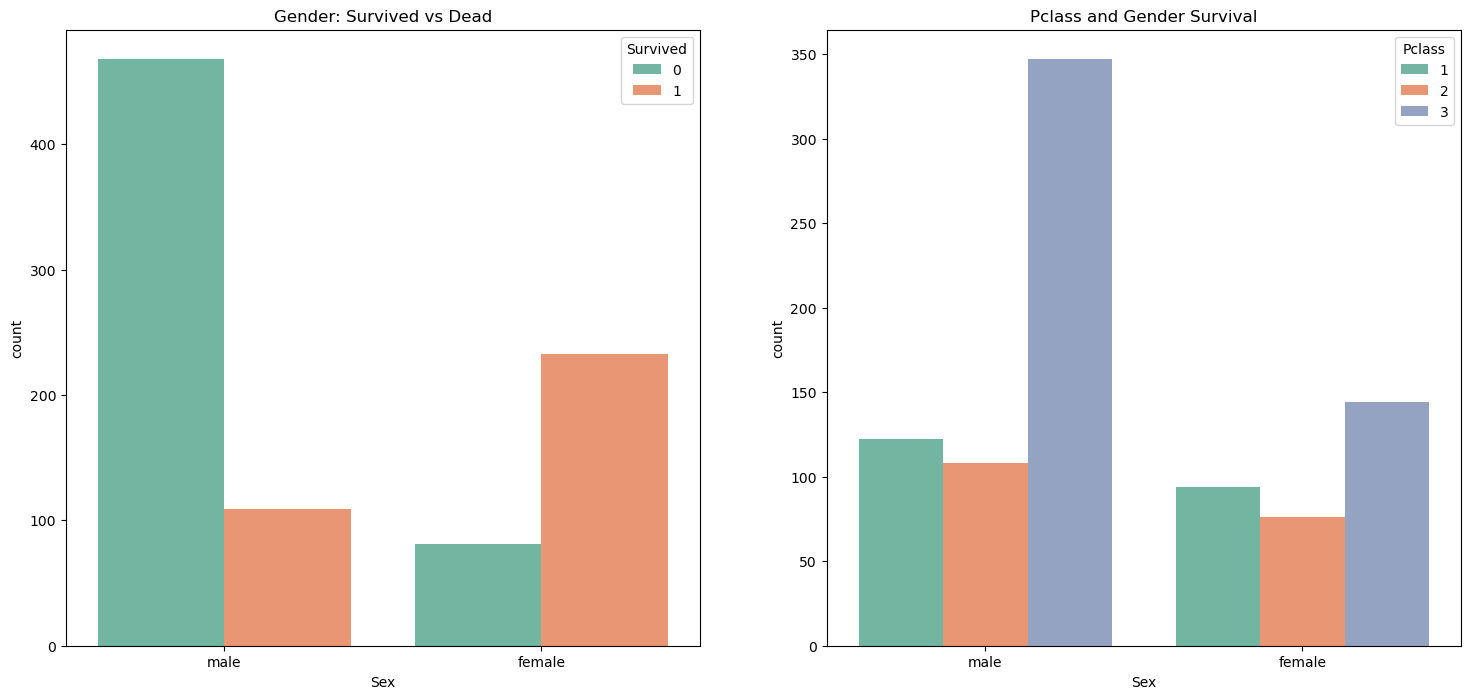

In [461]:

unique_sex = train['Sex'].unique() # checking the unique values in the 'Sex' column
print(unique_sex)
missing_sex = train['Sex'].isnull().sum() # checking the number of missing values in the 'Sex' column
print(missing_sex)


survival_rate_by_sex = train.groupby('Sex')['Survived'].mean()
print(survival_rate_by_sex)
#Graph
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # Create subplots
sns.countplot(x='Sex', hue="Survived", data=train, ax=ax[0],palette="Set2")
ax[0].set_title('Gender: Survived vs Dead')
sns.countplot(x='Sex', hue='Pclass', data=train, ax=ax[1],palette="Set2")
ax[1].set_title('Pclass and Gender Survival')

# 5-Pclass

 Unique values in P class are:  [3 1 2]
0
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


C:\Users\PMLS\AppData\Local\Temp\ipykernel_23132\545085601.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_by_pclass.index, y=survival_rate_by_pclass.values, palette='viridis')


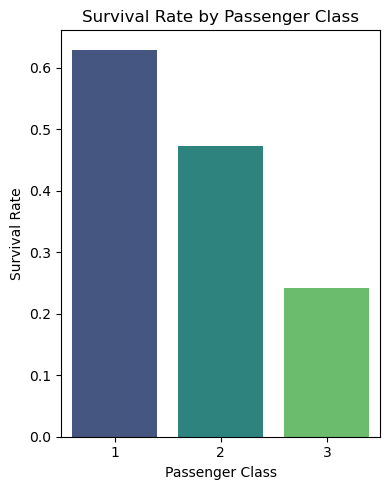

In [464]:

unique_pclass = train['Pclass'].unique()# cchecking the unique values in the 'Pclass' column
print(" Unique values in P class are: ",unique_pclass)

missing_pclass = train['Pclass'].isnull().sum() # checking the number of missing values in the 'Pclass' column
print(missing_pclass)
survival_rate_by_pclass =train.groupby('Pclass')['Survived'].mean() # calculating the survival rate based on passenger class

print(survival_rate_by_pclass)


# Plotting

plt.figure(figsize=(4, 5))

# Bar plot for survival rate by passenger class
sns.barplot(x=survival_rate_by_pclass.index, y=survival_rate_by_pclass.values, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()


there are 3 unique values in pclass that is 1,2,3
- 0 missing values
- the maximmum survival rate is in 1st class
- then in the 2d class
- then in the 3rd class

# 5-Siblings

C:\Users\PMLS\AppData\Local\Temp\ipykernel_23132\4263420231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="SibSp", y="Survived", data=train, palette=custom_palette)


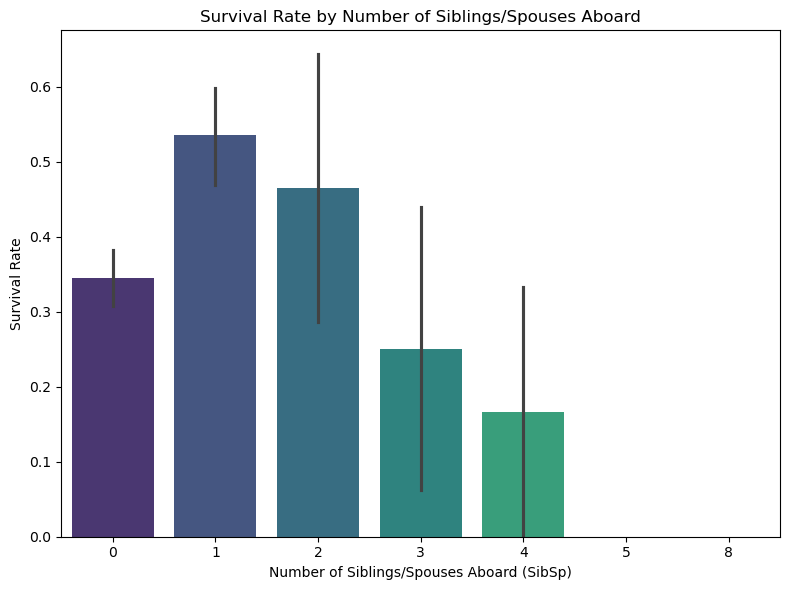

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp = 3 who survived: 25.0
Percentage of SibSp = 4 who survived: 16.666666666666664
Percentage of SibSp = 5 who survived: 0
Percentage of SibSp = 8 who survived: 0


In [468]:

plt.figure(figsize=(8, 6))

custom_palette = sns.color_palette("viridis", n_colors=len(train["SibSp"].unique()))

sns.barplot(x="SibSp", y="Survived", data=train, palette=custom_palette)
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard (SibSp)')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()
for sibsp_count in sorted(train["SibSp"].unique()):
    survival_counts = train["Survived"][train["SibSp"] == sibsp_count].value_counts(normalize=True)
    percentage = survival_counts.get(1, 0) * 100
    print(f"Percentage of SibSp = {sibsp_count} who survived:", percentage)


# Handling the missing values

In [472]:

columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin'] #dropping column not necessary for predictions
train = train.drop(columns_to_drop, axis=1)

print(train.head(2))

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0         0       3    male  22.0      1      0   7.2500        S   
1         1       1  female  38.0      1      0  71.2833        C   

      AgeGroup  CabinKnown  
0  Young Adult           0  
1        Adult           1  


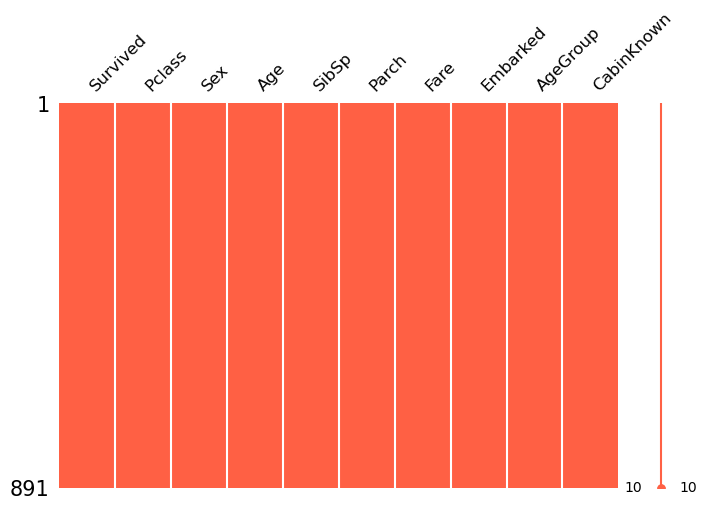

In [475]:
import missingno
missingno.matrix(train, figsize=(8,5), fontsize=12, color=(1, 0.38, 0.27));  #filling the missing values

-  converting the categorical variable into the numerical variable by using category_encoder

In [251]:

import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked','AgeGroup'])
train_enc= encoder.fit_transform(train)
train_enc.head(15)

C:\Users\PMLS\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\PMLS\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\PMLS\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will c

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinKnown,CabinBool
0,1,1,1,22.0,1,0,7.2500,1,3,0,0
1,2,2,2,38.0,1,0,71.2833,2,4,1,1
2,2,1,2,26.0,0,0,7.9250,1,3,0,0
3,2,2,2,35.0,1,0,53.1000,1,3,1,1
4,1,1,1,35.0,0,0,8.0500,1,3,0,0
5,1,1,1,28.0,0,0,8.4583,3,3,0,0
6,1,2,1,54.0,0,0,51.8625,1,4,1,1
7,1,1,1,2.0,3,1,21.0750,1,1,0,0
8,2,1,2,27.0,0,2,11.1333,1,3,0,0
9,2,3,2,14.0,1,0,30.0708,2,2,0,0


# numeric codes for each age group:
- Young Adult= 3
- Adult= 4
- child= 1
- Teen= 2
- senior= 5




# Training and testing

In [253]:
x= train_enc.drop(['Survived'],axis=1)
y = train['Survived']

- splitting the dataset 

In [256]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state= 21)

In [266]:
xtrain.head(15)



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinKnown,CabinBool
241,1,2,28.0,1,0,15.5000,3,3,0,0
734,3,1,23.0,0,0,13.0000,1,3,0,0
581,2,2,39.0,1,1,110.8833,2,4,1,1
456,2,1,65.0,0,0,26.5500,1,5,1,1
118,2,1,24.0,0,1,247.5208,2,3,1,1
621,2,1,42.0,1,0,52.5542,1,4,1,1
162,1,1,26.0,0,0,7.7750,1,3,0,0
46,1,1,28.0,1,0,15.5000,3,3,0,0
709,1,1,28.0,1,1,15.2458,2,3,0,0
647,2,1,56.0,0,0,35.5000,2,4,1,1


In [260]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Model Implementation

# Logistic Regression

In [485]:
model = LogisticRegression()
model.fit(xtrain, ytrain)
train_predictions = model.predict(x)

print("Training dataset score: {:.2f}".format(model.score(xtrain, ytrain)),'\n')
print("Test dataset score: {:.2f}".format(model.score(xtest, ytest)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(ytest,y_predict)),'\n')

Training dataset score: 0.81 

Test dataset score: 0.83 

Accuracy Score: 0.83 



C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Classification Report

In [333]:
print("Classification_Report: \n",classification_report(ytest,y_predict))

Classification_Report: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       161
           1       0.82      0.74      0.78       107

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



- Confusion Matrix

Confusion Matrix: 
 [[144  17]
 [ 28  79]] 



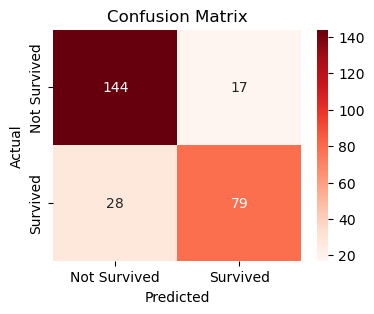

In [336]:
print("Confusion Matrix: \n",confusion_matrix(ytest,y_predict),'\n')
cm = confusion_matrix(ytest, y_predict)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Survived Passenger With Names

In [317]:
train_predictions = model.predict(x)

# Create a DataFrame for the output
results_train = pd.DataFrame({
    'Name': train['Name'],
    'Predicted Survival': train_predictions
})

# Display the results DataFrame
pd.set_option('display.max_colwidth', None)  # Ensure full display of 'Name' column
print(results_train.head(15))  # Adjust the number in head() to display more or fewer rows

                                                   Name  Predicted Survival
0                               Braund, Mr. Owen Harris                   0
1   Cumings, Mrs. John Bradley (Florence Briggs Thayer)                   1
2                                Heikkinen, Miss. Laina                   1
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)                   1
4                              Allen, Mr. William Henry                   0
5                                      Moran, Mr. James                   0
6                               McCarthy, Mr. Timothy J                   0
7                        Palsson, Master. Gosta Leonard                   0
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)                   0
9                   Nasser, Mrs. Nicholas (Adele Achem)                   1
10                      Sandstrom, Miss. Marguerite Rut                   1
11                             Bonnell, Miss. Elizabeth                   1
12          

# Performance Matrices

In [272]:
accuracy = accuracy_score(ytest,y_predict) * 100
print("Logistic Regression Accuracy:  " +str(round(accuracy,2)) + '%')
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(ytest,y_predict))
print('MSE:', metrics.mean_squared_error(ytest,y_predict))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(ytest,y_predict)))

Logistic Regression Accuracy:  83.21%
MAE: 0.16791044776119404
MSE: 0.16791044776119404
RMSE: 0.4097687735311148


- Accuracy: 83.21% is quite good, indicating that  model has correctly classified about 83% of the cases.
- MAE: 0.168 is relatively low, suggesting that the average error in the  predictions is reasonably small.
- MSE: 0.168 is the same as MAE in this case which  indicates the squared errors average out similarly to absolute errors.
- RMSE: 0.410 the error magnitude in the same units as  target variable, and this is also relatively low.

# K - Nearest Neighbour

In [353]:

knn = KNeighborsClassifier(9)
knn.fit(xtrain,ytrain)
y_pred_knn = knn.predict(xtest)

print("Training set score: {:.2f}".format(knn.score(xtrain, ytrain)))
print("Test set score: {:.2f}".format(knn.score(xtest, ytest)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(ytest,y_pred_knn)))

Training set score: 0.78
Test set score: 0.73
Accuracy Score: 0.73


- Classification Report

In [355]:
print("Classification_Report: \n",classification_report(ytest,y_pred_knn))

Classification_Report: 
               precision    recall  f1-score   support

           0       0.73      0.86      0.79       161
           1       0.71      0.53      0.61       107

    accuracy                           0.73       268
   macro avg       0.72      0.69      0.70       268
weighted avg       0.73      0.73      0.72       268



- Confusion Matrix

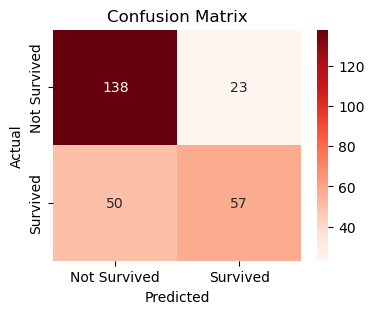

In [357]:
cm = confusion_matrix(ytest, y_pred_knn)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Survived Passenger Names ( Predicted)

In [497]:
train_predictions_knn = knn.predict(x)

results_train_knn = pd.DataFrame({ #creatingg a DataFrame for the output and print it
    'Name': train['Name'],
    'Predicted Survival': train_predictions_knn
})

pd.set_option('display.max_colwidth', None)  # ensuring full display of 'Name' column
print(results_train_knn.head(15))  # adjusting the number in head() to display more or fewer rows

                                                   Name  Predicted Survival
0                               Braund, Mr. Owen Harris                   0
1   Cumings, Mrs. John Bradley (Florence Briggs Thayer)                   1
2                                Heikkinen, Miss. Laina                   0
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)                   1
4                              Allen, Mr. William Henry                   0
5                                      Moran, Mr. James                   0
6                               McCarthy, Mr. Timothy J                   1
7                        Palsson, Master. Gosta Leonard                   1
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)                   0
9                   Nasser, Mrs. Nicholas (Adele Achem)                   0
10                      Sandstrom, Miss. Marguerite Rut                   1
11                             Bonnell, Miss. Elizabeth                   0
12          

# Comparison Of KNN and Logistic Regression Prediction:

In [499]:

results_comparison = pd.DataFrame({ #combining predictions into a DataFrame
    'Name': train['Name'].iloc[xtest.index],
    'Actual Survival': ytest,
    'Logistic Regression Prediction': y_predict,
    'KNN Prediction': y_pred_knn
})

results_comparison['Match'] = results_comparison['Logistic Regression Prediction'] == results_comparison['KNN Prediction'] # adding a column to show if predictions match

pd.set_option('display.max_colwidth', None)  
print(results_comparison.head(15)) #showing first 15 rows
print("""

""")
matching_percentage = results_comparison['Match'].mean() * 100 #calculating and display the percentage of matching predictions
print(f"Percentage of Matching Predictions: {matching_percentage:.2f}%")

                                                Name  Actual Survival  \
617  Lobb, Mrs. William Arthur (Cordelia K Stanlick)                0   
379                      Gustafsson, Mr. Karl Gideon                0   
725                              Oreskovic, Mr. Luka                0   
826                                     Lam, Mr. Len                0   
450                            West, Mr. Edwy Arthur                0   
147                 Ford, Miss. Robina Maggie "Ruby"                0   
698                         Thayer, Mr. John Borland                0   
397                          McKane, Mr. Peter David                0   
525                               Farrell, Mr. James                0   
505       Penasco y Castellana, Mr. Victor de Satode                0   
180                     Sage, Miss. Constance Gladys                0   
255          Touma, Mrs. Darwis (Hanne Youssef Razi)                1   
433                       Kallio, Mr. Nikolai Erlan

In [ ]:
# KNN accuracy: 73%
#